In [26]:
import os 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()


In [27]:
#  Store predictions into All; All Pedestrians; All except Pedestrians; 
#  Only store if the prediction value is above 50% conf. 

def predictions(experiment_path, files): 
    all_predictions = []
    only_pedestrians = [] 
    not_pedestrians = [] 

    for fp in files: 
        with open(experiment_path + fp) as f: 
            line = f.readline()
            while line:
                l = [fp]
                [l.append(float(x)) for x in line.strip().split(' ')]

                if l[-1] > 0.5: 
                    all_predictions.append(l)  
                    if l[1] == 3: 
                        only_pedestrians.append(l)
                    else: 
                        not_pedestrians.append(l)
                line = f.readline()

    all_r = np.array(all_predictions)
    print(np.shape(np.unique(all_r[:,0])))

    ped_r = np.array(only_pedestrians)
    # print(np.shape(np.unique(ped_r[:,0])))

    notp_r = np.array(not_pedestrians)
    # print(np.shape(np.unique(notp_r[:,0])))
    return all_r, ped_r, notp_r

#  Store predictions into All; All Pedestrians; All except Pedestrians; 
#  Only store if the prediction value is above 50% conf. 

def label_ext(experiment_path, files): 
    all_predictions = []

    for fp in files: 
        with open(experiment_path + fp) as f: 
            line = f.readline()
            while line:
                l = [fp]
                [l.append(float(x)) for x in line.strip().split(' ')]

                all_predictions.append(l)  
                line = f.readline()
    
    all_r = np.array(all_predictions)
    print(np.shape(np.unique(all_r[:,0])))
    return all_r

In [28]:
def plot_experiments(experiment_location):
    test_files = os.listdir(experiment_location)

    ## Sort confidence predictions based on 
    yolo_predictions, yolo_pedestrians, yolo_nonpedestrians = predictions(experiment_location, test_files)
    conf_sorted = yolo_pedestrians[np.argsort(yolo_pedestrians[:,-1])][:, [0, -1]]
    a = conf_sorted[:,1].astype('float32')[::-1]

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.ylim([0.5, 1.0])
    ax.plot(a)
    return yolo_predictions

(289,)
(200,)
(270,)
(301,)
(302,)
(300,)


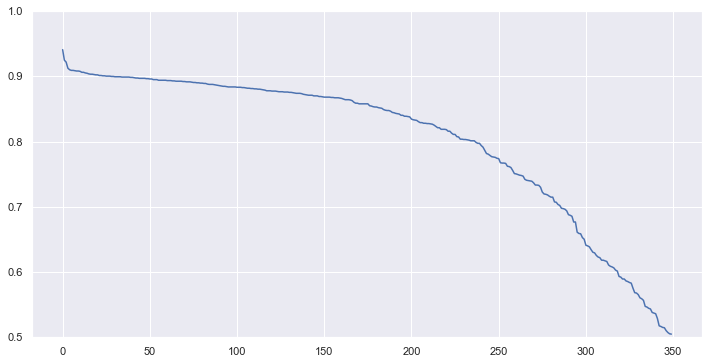

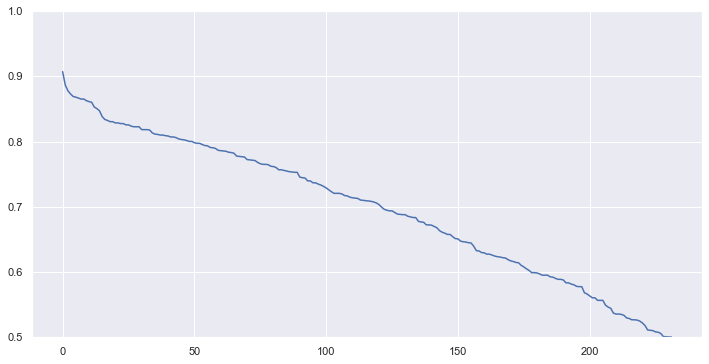

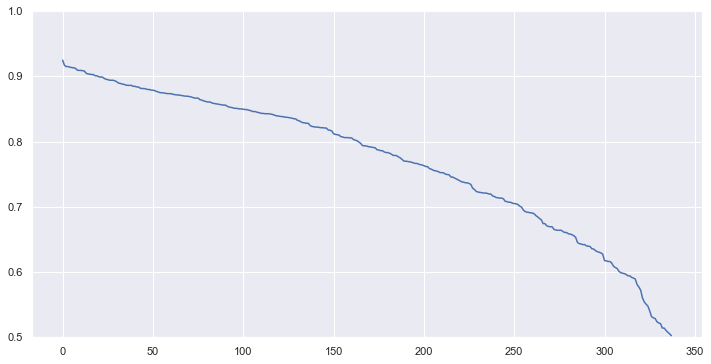

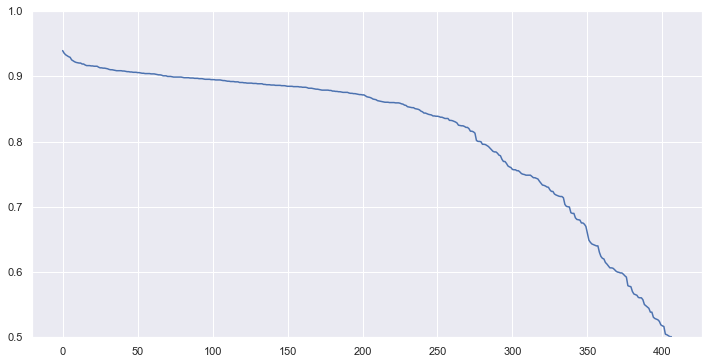

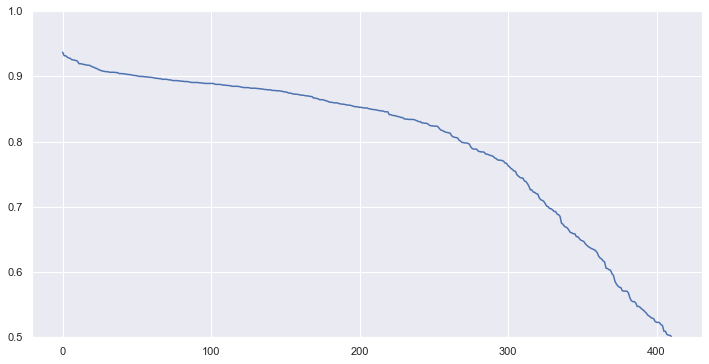

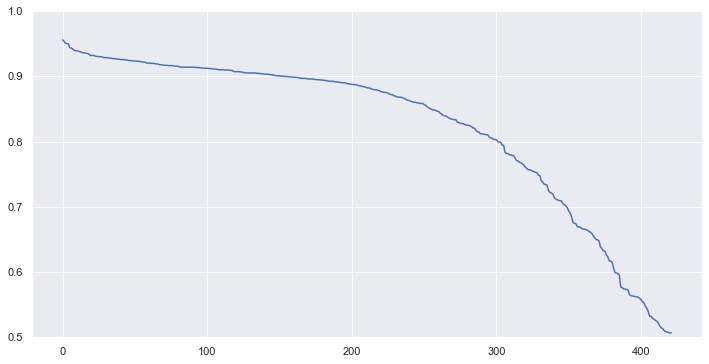

In [29]:
experiment_location = './gray_results/boxhead/test/gray_boxhead_lower/labels/'
gray_box_lower = plot_experiments(experiment_location)
experiment_location = './gray_results/boxhead/test/gray_boxhead_upper/labels/'
gray_box_upper = plot_experiments(experiment_location)
experiment_location = './gray_results/boxhead/test/gray_boxhead_regular/labels/'
gray_box_regular = plot_experiments(experiment_location)

experiment_location = './gray_results/regular/test/gray_yolo_lower/labels/'
gray_lower = plot_experiments(experiment_location)
experiment_location = './gray_results/regular/test/gray_yolo_upper/labels/'
gray_upper = plot_experiments(experiment_location)
experiment_location = './gray_results/regular/test/gray_yolo_regular/labels/'
gray_regular = plot_experiments(experiment_location)


(748,)
(314,)


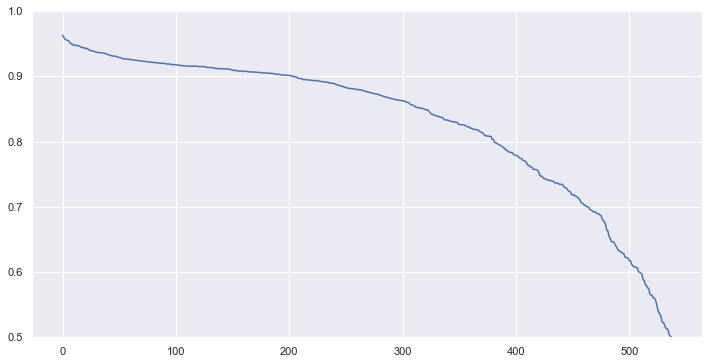

In [30]:
# Yolo Regular results 
experiment_location = './results/test/yolo/labels/'
yolo_regular = plot_experiments(experiment_location)

testing_path = './subset/labels/'
test_files = os.listdir(testing_path)
labels = label_ext(testing_path, test_files)

unique_test_files = np.unique(labels[:,0])
res = []

for utf in unique_test_files: 
    
    yy = np.array(yolo_regular[yolo_regular[:,0]==utf,:])[:,1:].astype('float32')

    ym = yy[yy[:,0]==3,-1]
    
    res.append([0 if ym.size==0 else ym.mean()])
    
yolo_reg = np.array(res)
#rr = rr[~np.all(rr == 0, axis=1)]
#yolo_sort_array = np.argsort(rr[:,0])
# yolo_reg = rr[yolo_sort_array,:]

#fig, ax = plt.subplots(figsize=(12, 6))
#plt.ylim([0.5, 1.0])
#ax.plot(yolo_reg[:,0], 'b.')
#ax.legend(['Full', 'lower', 'upper'])
#plt.title('Occluded with Walls')

In [31]:
# Gray scale testing: 
testing_path = './gray/subset/labels/'
test_files = os.listdir(testing_path)
labels = label_ext(testing_path, test_files)

unique_test_files = np.unique(labels[:,0])
res = []

for utf in unique_test_files: 
    
    yy = np.array(gray_regular[gray_regular[:,0]==utf,:])[:,1:].astype('float32')
    ly = np.array(gray_lower[gray_lower[:,0]==utf,:])[:,1:].astype('float32')
    uy = np.array(gray_upper[gray_upper[:,0]==utf,:])[:,1:].astype('float32')

    ym = yy[yy[:,0]==3,-1]
    lm = ly[ly[:,0]==3,-1]
    um = uy[uy[:,0]==3,-1]
    
    res.append([0 if ym.size==0 else ym.mean(), 0 if lm.size==0 else lm.mean(), 0 if um.size==0 else um.mean()])
    

rr = np.array(res)
ry = yolo_reg[~np.all(rr == 0, axis=1)]
rr = rr[~np.all(rr == 0, axis=1)]
sort_array = np.argsort(rr[:,0])

rs = rr[sort_array,:]
ry = ry[sort_array,:]


(314,)


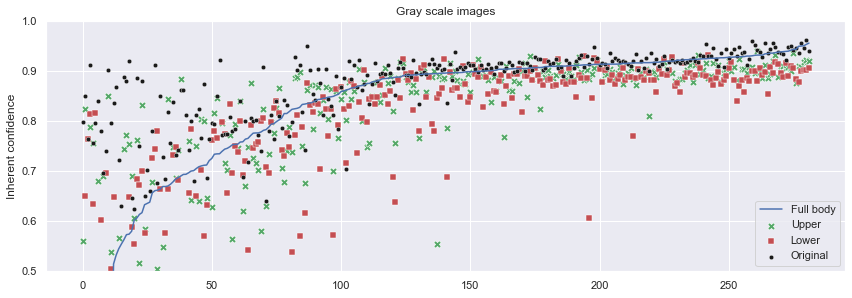

In [32]:
fig, ax = plt.subplots(figsize=(12, 4.3))
plt.ylim([0.5, 1.0])
xr = [x for x in range(len(ry))]
sns.lineplot(data=rs[:,0], color='b')
sns.scatterplot(data=rs[:,1], color='g', marker='X', s=55)
sns.scatterplot(data=rs[:,2], color='r', marker='s')#, s=20)
sns.scatterplot(data=np.squeeze(ry),  color='k', s=20)
#sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Full body', 'Upper', 'Lower', 'Original'],loc='lower right')
plt.ylabel('Inherent confidence')
plt.title('Gray scale images')
plt.tight_layout()
plt.savefig('./plots/confidence_gray_scale.pdf')

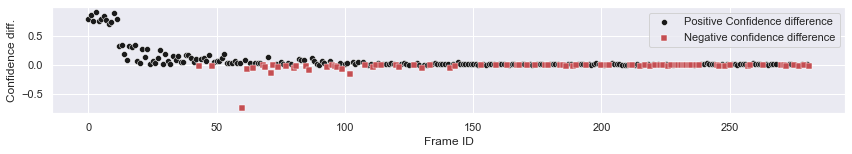

In [33]:
diff_vector = np.squeeze(ry)-rs[:,0]

xr = [x for x in range(len(diff_vector))]
positives = diff_vector[diff_vector > 0]
negatives = diff_vector[diff_vector < 0]
pxr = np.array(xr)[diff_vector > 0]
nxr = np.array(xr)[diff_vector < 0]

fig, ax = plt.subplots(figsize=(12, 2.3))
sns.scatterplot(x=pxr, y=positives, color='k')
sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Positive Confidence difference', 'Negative confidence difference'])
# ax.set(xscale="log", yscale="log")
plt.ylabel('Confidence diff.')
plt.xlabel('Frame ID')
plt.tight_layout()
plt.savefig('./plots/difference_gray_scale.pdf')

In [34]:
ns = len(unique_test_files)
lrs = len(rs)


print("Percent missed predictions:", (np.sum(np.abs(diff_vector)>0.5)+(ns-lrs))/ns )
print("Better with original:", np.sum(diff_vector>0)/ns)
print("Worse  with original:", np.sum(diff_vector<0)/ns)

print("Average confidence:", np.average(rs,axis=0))
print("Average confidence loss:", np.sum(diff_vector)/314)

print("number of samples:", ns)

Percent missed predictions: 0.14331210191082802
Better with original: 0.6242038216560509
Worse  with original: 0.2643312101910828
Average confidence: [0.81577592 0.78476577 0.77000535]
Average confidence loss: 0.04986981392666033
number of samples: 314


In [35]:
both = np.array(np.logical_and(rs[:,1] > rs[:,0], rs[:,2] > rs[:,0]))
upper = np.array(rs[:,2] > rs[:,0])
lower = np.array(rs[:,1] > rs[:,0])

both.sum(), lower.sum(), upper.sum(), len(rr)

(30, 70, 60, 282)

In [36]:
# Gray scale testing: 
testing_path = './gray/subset/labels/'
test_files = os.listdir(testing_path)
labels = label_ext(testing_path, test_files)

unique_test_files = np.unique(labels[:,0])
res = []

for utf in unique_test_files: 
    
    yy = np.array(gray_box_regular[gray_box_regular[:,0]==utf,:])[:,1:].astype('float32')
    ly = np.array(gray_box_lower[gray_box_lower[:,0]==utf,:])[:,1:].astype('float32')
    uy = np.array(gray_box_upper[gray_box_upper[:,0]==utf,:])[:,1:].astype('float32')

    ym = yy[yy[:,0]==3,-1]
    lm = ly[ly[:,0]==3,-1]
    um = uy[uy[:,0]==3,-1]
    
    res.append([0 if ym.size==0 else ym.mean(), 0 if lm.size==0 else lm.mean(), 0 if um.size==0 else um.mean()])
    

rr = np.array(res)
ry = yolo_reg[~np.all(rr == 0, axis=1)]
rr = rr[~np.all(rr == 0, axis=1)]
sort_array = np.argsort(rr[:,0])

rs = rr[sort_array,:]
ry = ry[sort_array,:]


(314,)


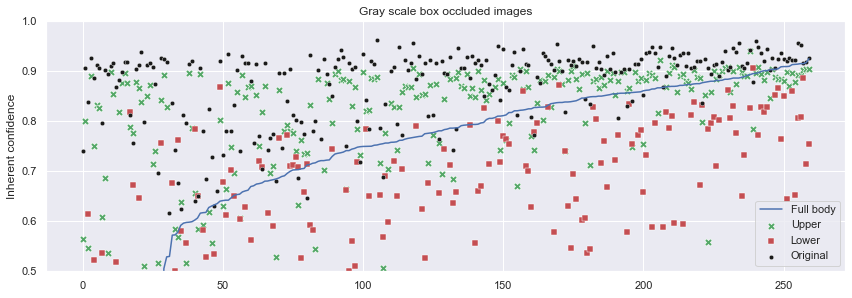

In [37]:
fig, ax = plt.subplots(figsize=(12, 4.3))
plt.ylim([0.5, 1.0])
xr = [x for x in range(len(ry))]
sns.lineplot(data=rs[:,0], color='b')
sns.scatterplot(data=rs[:,1], color='g', marker='X', s=55)
sns.scatterplot(data=rs[:,2], color='r', marker='s')#, s=20)
sns.scatterplot(data=np.squeeze(ry),  color='k', s=20)
#sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Full body', 'Upper', 'Lower', 'Original'],loc='lower right')
plt.ylabel('Inherent confidence')
plt.title('Gray scale box occluded images')
plt.tight_layout()
plt.savefig('./plots/confidence_gray_box.pdf')

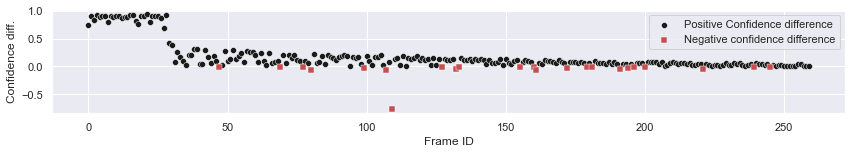

In [38]:
diff_vector = np.squeeze(ry)-rs[:,0]

xr = [x for x in range(len(diff_vector))]
positives = diff_vector[diff_vector > 0]
negatives = diff_vector[diff_vector < 0]
pxr = np.array(xr)[diff_vector > 0]
nxr = np.array(xr)[diff_vector < 0]

fig, ax = plt.subplots(figsize=(12, 2.3))
sns.scatterplot(x=pxr, y=positives, color='k')
sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Positive Confidence difference', 'Negative confidence difference'])
# ax.set(xscale="log", yscale="log")
plt.ylabel('Confidence diff.')
plt.xlabel('Frame ID')
plt.tight_layout()
plt.savefig('./plots/difference_gray_box.pdf')

In [39]:
ns = len(unique_test_files)
lrs = len(rs)

print("Percent missed predictions:", np.sum(np.abs(diff_vector)>0.5)/314)
print("Percent missed predictions:", (np.sum(np.abs(diff_vector)>0.5)+(ns-lrs))/ns )
print("Better with original:", np.sum(diff_vector>0)/314)

print("Average confidence:", np.average(rs,axis=0))
print("Average confidence loss:", np.sum(diff_vector)/314)


both = np.array(np.logical_and(rr[:,1] > rr[:,0], rr[:,2] > rr[:,0]))
upper = np.array(rr[:,2] > rr[:,0])
lower = np.array(rr[:,1] > rr[:,0])

print("Which is best? Both, lower, upper"), both.sum(), lower.sum(), upper.sum(), len(rr)


Percent missed predictions: 0.09554140127388536
Percent missed predictions: 0.267515923566879
Better with original: 0.7547770700636943
Average confidence: [0.69770632 0.77876011 0.40328893]
Average confidence loss: 0.14340530250482497
Which is best? Both, lower, upper


(None, 24, 180, 31, 260)

In [15]:
both = np.array(np.logical_and(rs[:,1] > rs[:,0], rs[:,2] > rs[:,0]))
upper = np.array(rs[:,2] > rs[:,0])
lower = np.array(rs[:,1] > rs[:,0])

both.sum(), lower.sum(), upper.sum(), len(rr)

(24, 180, 31, 260)

In [23]:
len(unique_test_files)

314